In [4]:
import sqlite3
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from scipy.stats import ttest_ind 
import scipy.stats as stats 
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset 
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data 

df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,AvgSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,35.916617,260999.20,68601.68,1290667.91,25.2976925149551,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,30.072784,294438.66,144929.24,1015032.27,21.0628095235867,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,24.249870,343854.07,123780.22,1119816.92,24.6757858308182,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,22.333857,368242.80,257032.07,1214774.94,27.1399084080312,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,31.089295,249587.83,257032.07,1199901.61,28.412764200414,0.983556,1.396897


## Exploratory Data Analysis (EDA)

### Data Understanding and Variable Selection
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which attributes should be included in the final analysis.

### Distribution Analysis and Data Quality Checks
- In this phase of EDA, we analyze the resulting consolidated table to understand the distribution of each column.
- This analysis helps identify data patterns, detect anomalies or outliers, and validate overall data quality before proceeding with deeper analytical or modeling tasks.


In [21]:
# summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
AvgSalesPrice,10692.0,33.227648,125.261759,0.000000,10.161775,15.149911,27.659675,5.799990e+03


In [36]:
df.dtypes
df["ProfitMargin"] = df["ProfitMargin"].astype("float64")
df["Volume"] = df["Volume"].astype("float64")

In [28]:
# removing the inconsitent data 
df = pd.read_sql_query("""
    SELECT * FROM vendor_sales_summary 
    WHERE GrossProfit > 0 
    AND  ProfitMargin > 0 
    AND TotalSalesQuantity > 0
""" , conn)

In [37]:
# summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
PurchasePrice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
Volume,8565.0,864.406480,724.230365,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
TotalPurchaseDollars,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
TotalSalesQuantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
TotalSalesDollars,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
AvgSalesPrice,8565.0,31.773200,111.734932,4.900000e-01,10.155632,14.990000,25.854041,4.696990e+03


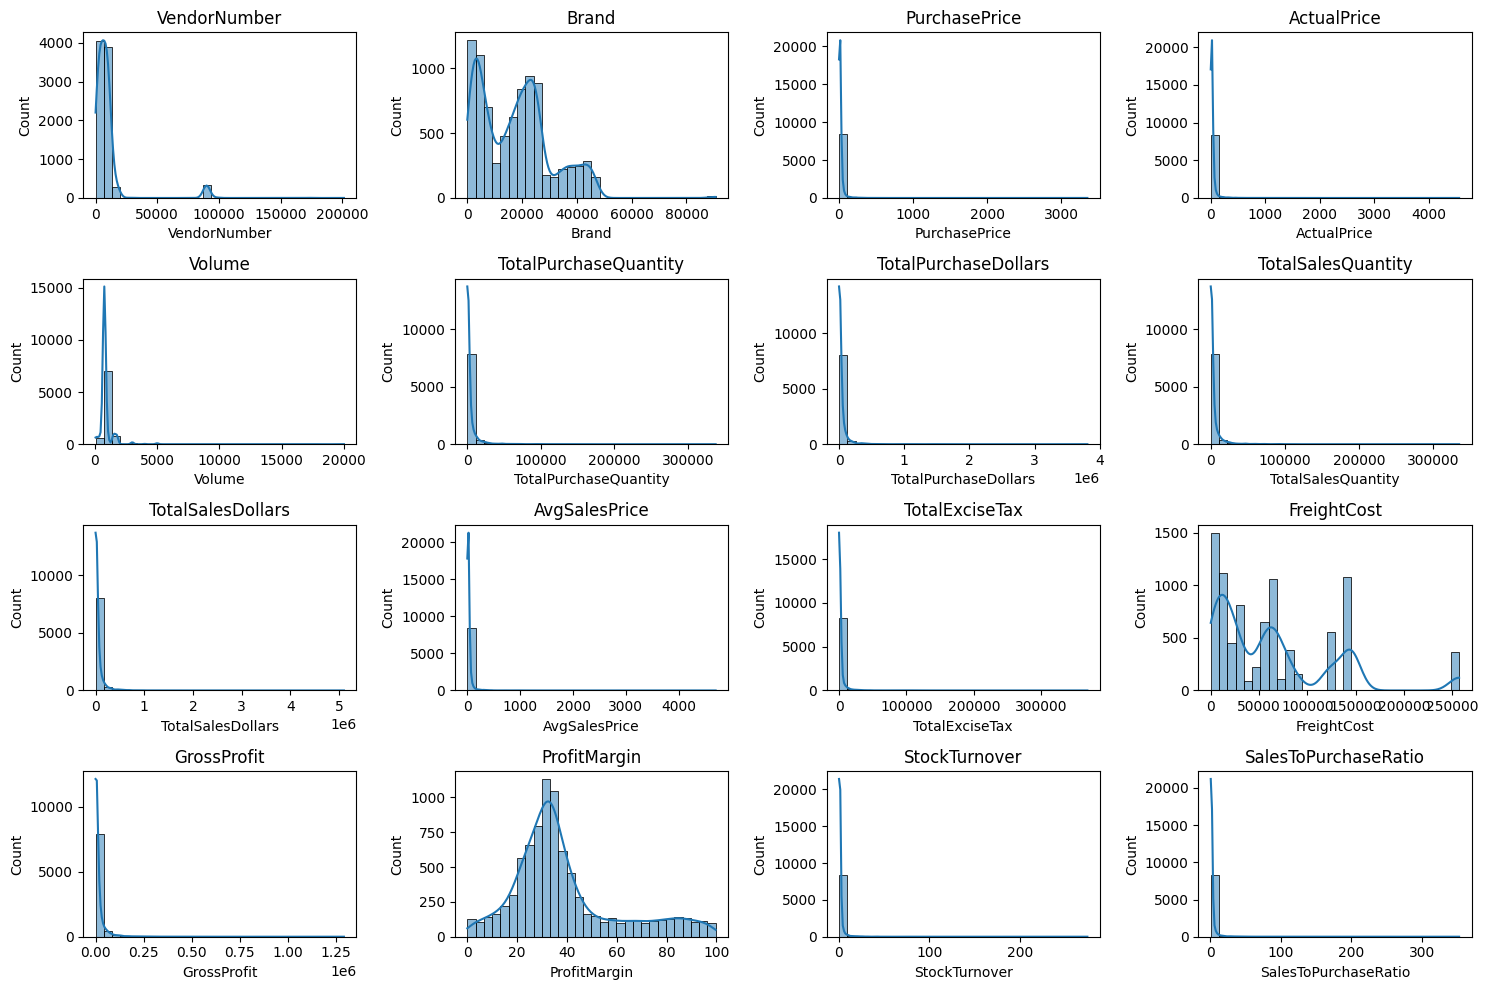

In [38]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


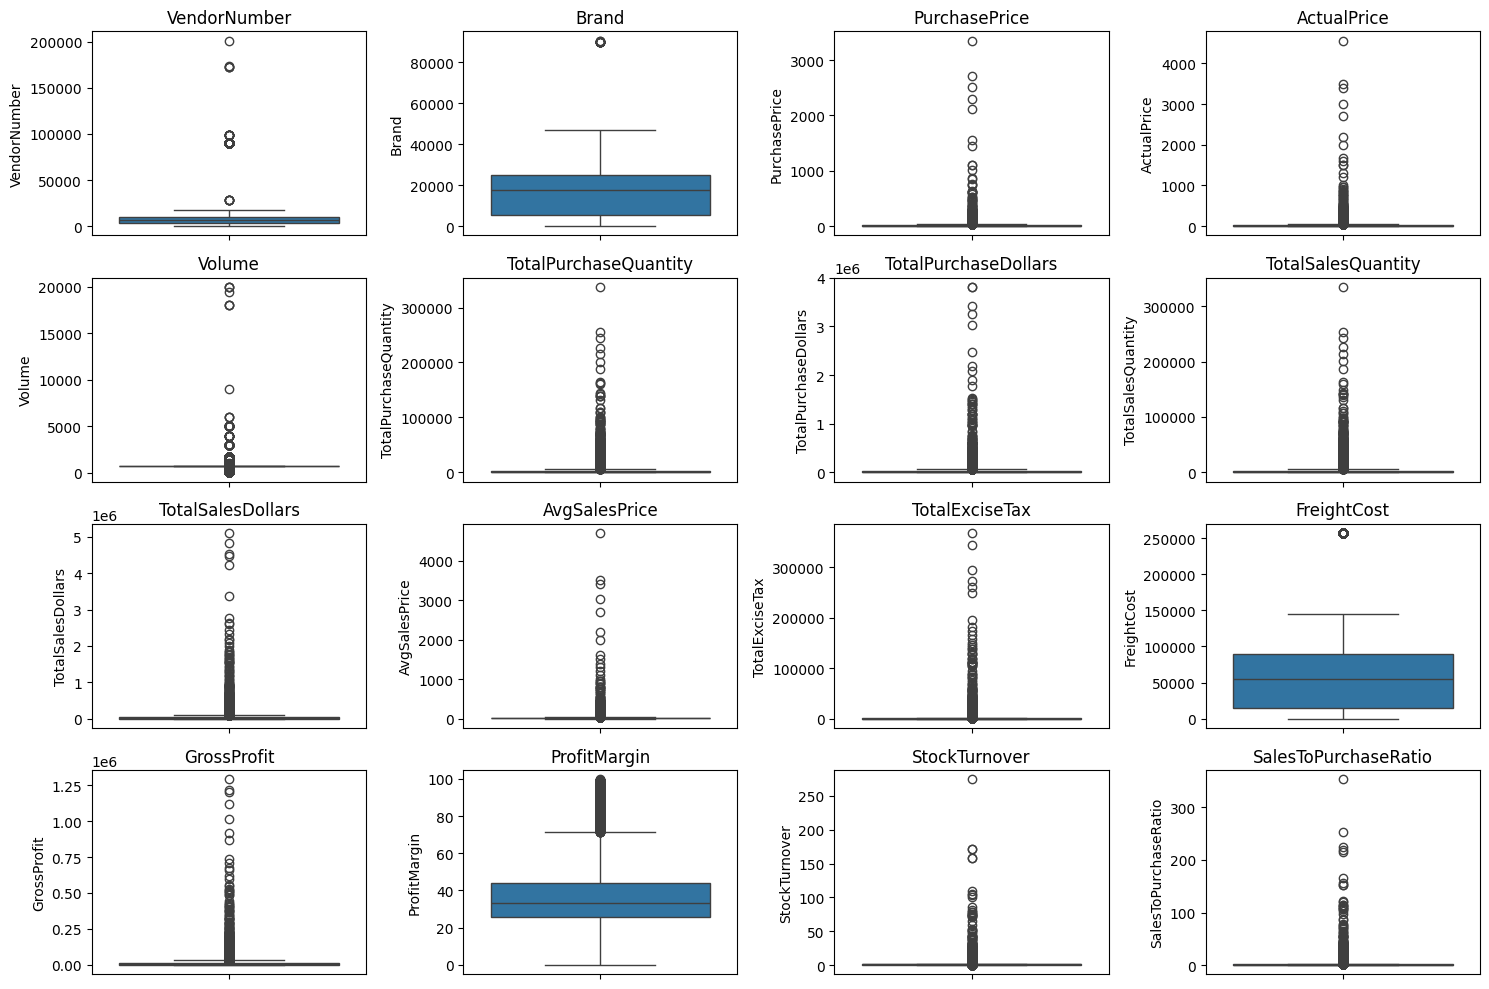

In [39]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Key Observations from Numerical Distributions

#### Negative and Zero Values
- **Gross Profit**: The minimum value of **-52,002.78** indicates that certain products or transactions are operating at a loss. This may result from high procurement costs or selling prices that are lower than the purchase price due to discounts or promotions.
- **Profit Margin**: The presence of values at or below **0** suggests scenarios where revenue is zero or insufficient to cover costs, leading to break-even or loss-making transactions.
- **Total Sales Quantity and Total Sales Dollars**: Minimum values of **0** indicate products that were purchased but not sold during the analysis period. These may represent slow-moving, inactive, or obsolete inventory.

#### Outliers Indicated by High Standard Deviation
- **Purchase Price and Actual Price**: The maximum values (**5,681.81** and **7,499.99**, respectively) are substantially higher than their means (**24.39** and **35.64**). This suggests the presence of premium or high-value products within the inventory.
- **Freight Cost**: A wide range, from **0.09** to **257,032.07**, indicates significant variability in logistics expenses. This may reflect differences between small shipments and large bulk deliveries, or potential inefficiencies in freight management.
- **Stock Turnover**: Values range from **0** to **274.5**, implying extreme variation in inventory movement. Values greater than **1** indicate that the quantity sold exceeded the quantity purchased during the period, likely due to sales being fulfilled from previously held stock.


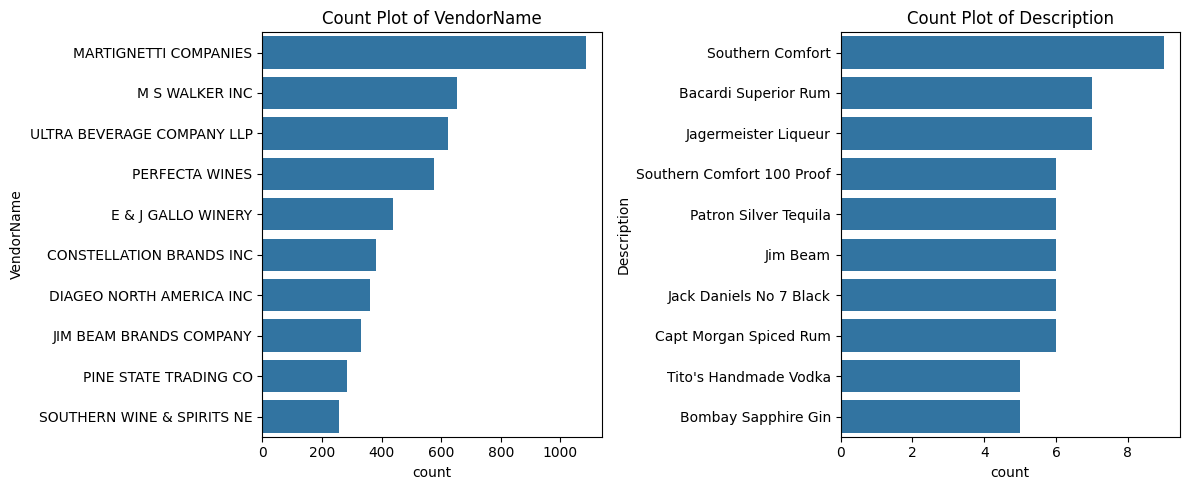

In [40]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot (1, 2, 1+i)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout ()
plt.show()

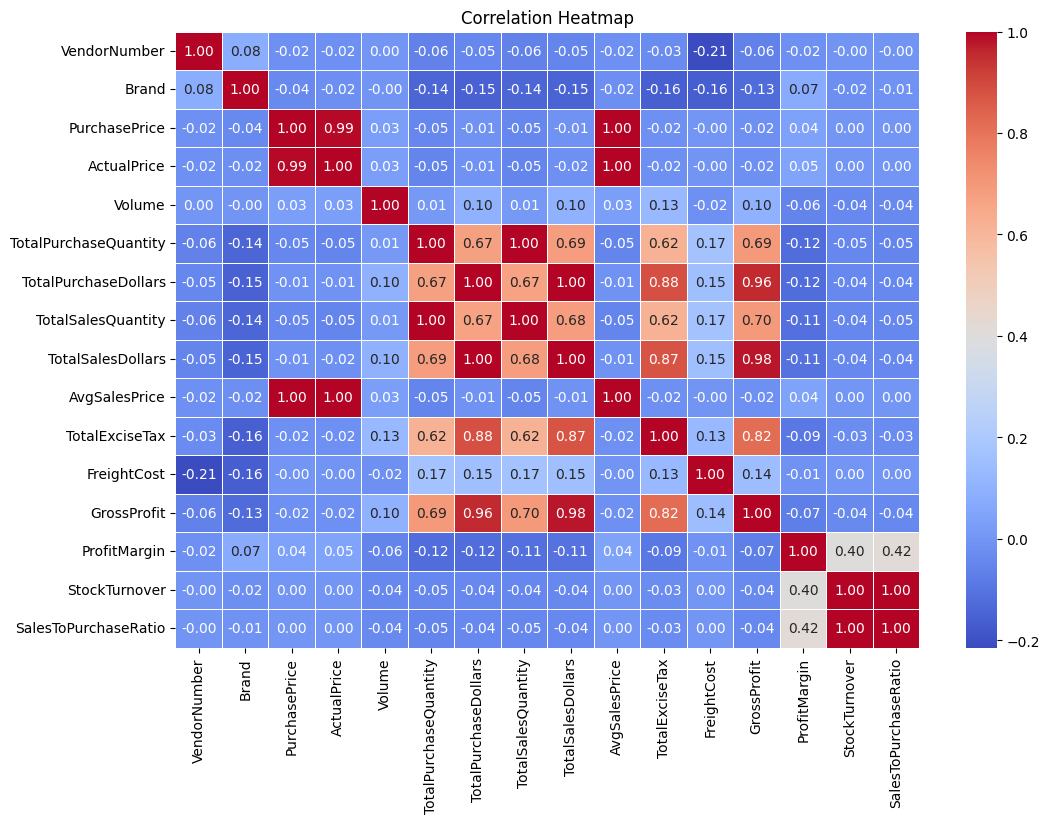

In [46]:
# Correlation Heatmap 
plt.figure(figsize =(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix , annot = True , fmt = ".2f" , cmap = 'coolwarm' , linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights

- **PurchasePrice** shows weak correlations with **TotalSalesDollars** (-0.012) and **GrossProfit** (-0.016), indicating that variations in purchase price have minimal direct impact on overall sales revenue or profitability.
- A strong positive correlation (**0.999**) exists between **TotalPurchaseQuantity** and **TotalSalesQuantity**, confirming efficient inventory movement and alignment between purchasing and sales activity.
- A negative correlation between **ProfitMargin** and **TotalSalesPrice** (-0.179) suggests that higher selling prices may be associated with lower margins, potentially due to competitive pricing strategies or increased costs at higher price points.
- **StockTurnover** exhibits weak negative correlations with both **GrossProfit** (-0.038) and **ProfitMargin** (-0.055), implying that faster inventory turnover does not necessarily translate into higher profitability.


## Data Analysis

- Identify brands that require **promotional or pricing adjustments** by focusing on those that exhibit **lower sales performance** but **higher profit margins**.


In [49]:
brand_performance = df.groupby('Description').agg({
                        'TotalSalesDollars':'sum',
                        'ProfitMargin':'mean'
                    }).reset_index()

In [51]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [52]:
low_sales_threshold

560.299

In [53]:
high_margin_threshold

64.97017552750114

In [55]:
# Filter Brands with low sales but high profit margins 
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold) ]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


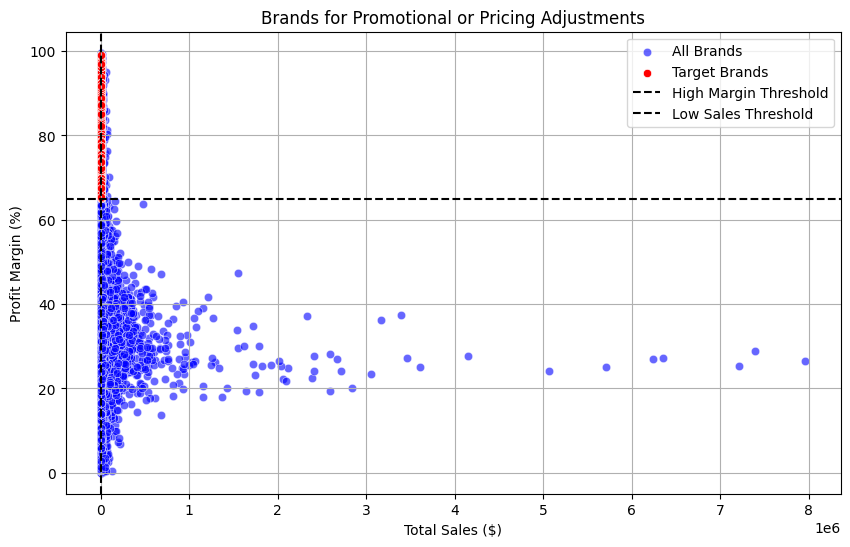

In [56]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.6 )

sns.scatterplot( data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline( high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold' )

plt.axvline( low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()


### Which vendor and brands demostrate the highest sales performances

In [96]:
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)

In [97]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return f"{value:.2f}"


In [98]:
top_vendors.apply(lambda x : format_dollars(x))


VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [99]:
top_brands.apply(lambda x : format_dollars(x))
# top_brands

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

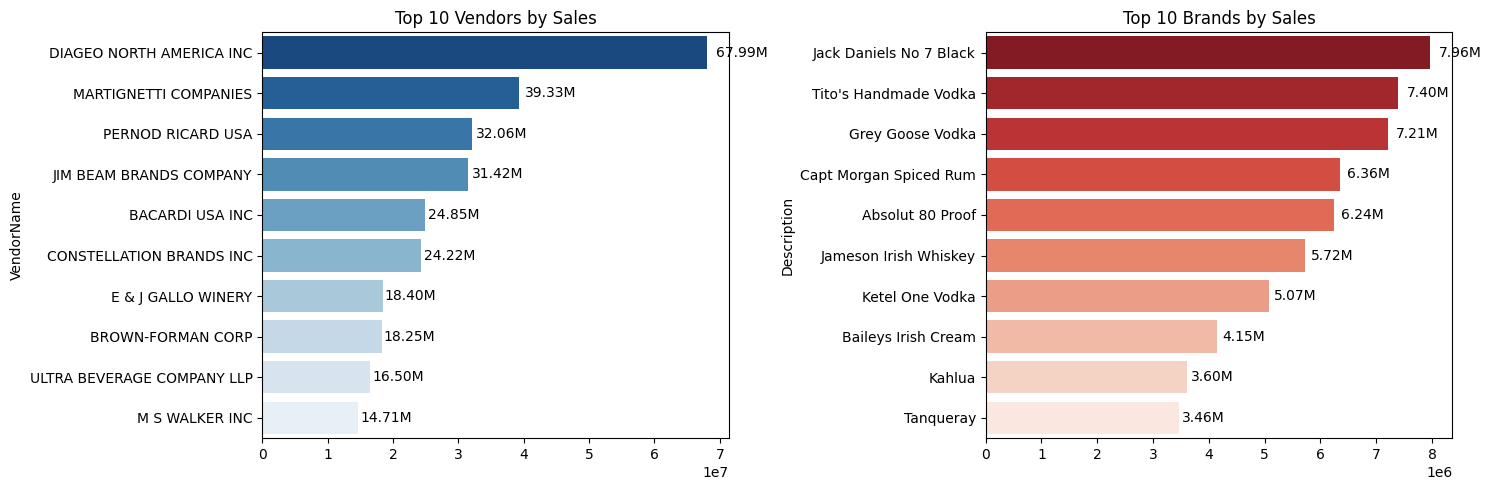

In [100]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


### Which Vendors contribute the most to total purchase dollars ? 

In [101]:
vendor_performance = df.groupby('VendorName').agg({
                        'TotalPurchaseDollars':'sum',
                        'GrossProfit':'sum',
                        'TotalSalesDollars':'sum'
                    }).reset_index()

vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [119]:
vendor_performance['Purchase_Contribution%'] = (vendor_performance['TotalPurchaseDollars']*100/vendor_performance['TotalPurchaseDollars'].sum())

In [120]:
vendor_performance = round(vendor_performance.sort_values('Purchase_Contribution%' , ascending = False),2) 

In [121]:
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,8.30,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,7.76,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,7.64,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,5.67,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,4.97,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,4.31,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,3.93,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,3.63,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,3.18,3.18


In [122]:
top_vendors['Purchase_Contribution%'].sum()

65.69000000000001

In [123]:
top_vendors ['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69,3.18


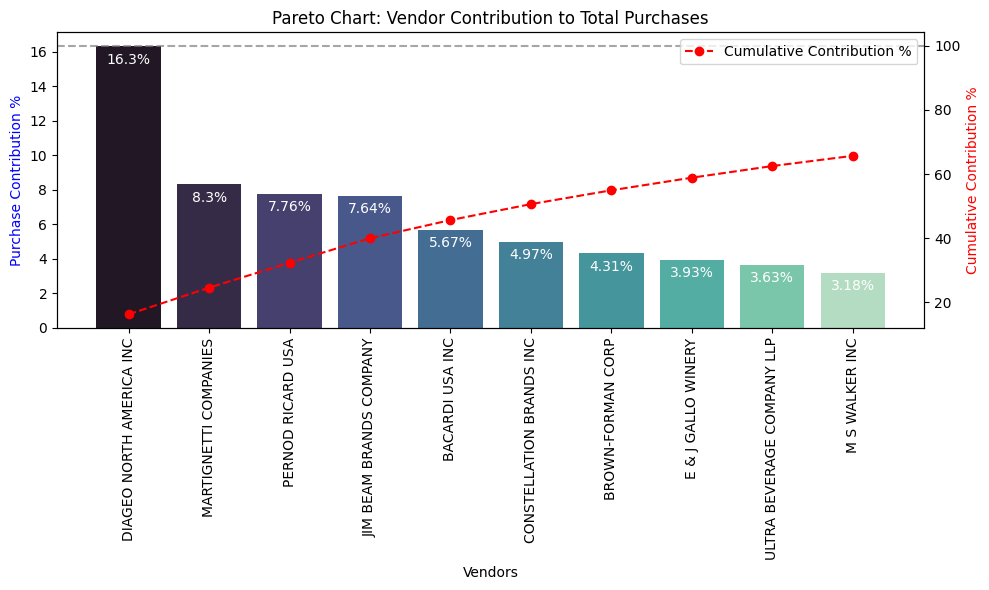

In [124]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1 )

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(
        i,
        value - 1,
        f"{value}%",
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')

ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### How much of total procurement is dependent on the top vendors ?

In [125]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


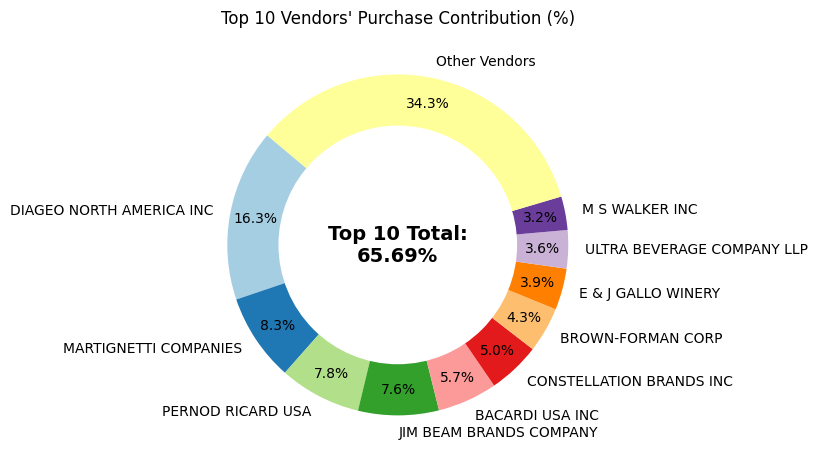

In [126]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)

total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0,
    0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendors' Purchase Contribution (%)")
plt.tight_layout()
plt.show()


### Q. Does purchasing in bulk reduce the unit price , and what is the optimal purchase volume for cost savings ? 

In [127]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [129]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [130]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


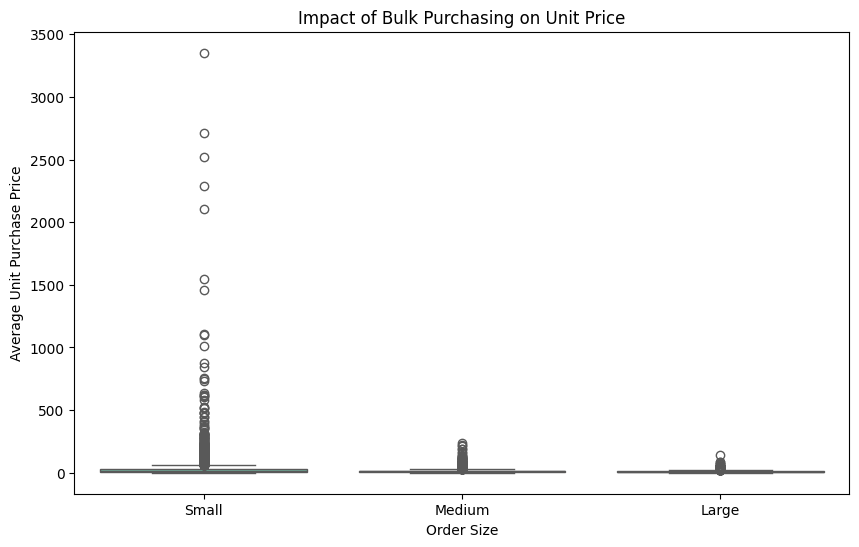

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


##### Impact of Bulk Purchasing on Unit Price

- Vendors purchasing in bulk (**Large Order Size**) receive the lowest average unit price (**$10.78 per unit**), which can translate into higher margins if inventory is managed efficiently.
- The unit price difference between **Small** and **Large** orders is significant, with an approximate **72% reduction in unit cost** for bulk purchases.
- This indicates that bulk pricing strategies are effective in incentivizing higher purchase volumes, driving increased overall sales despite lower revenue on a per-unit basis.


#### Q. Which vendors have low inventory turnover, indicating exces$ stock and slow-moving products? 9!

In [136]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover' , ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### Q. How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [137]:
df["UnsoldInventoryValue"] = ( (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"] )

print( "Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: 2.71M


In [138]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = (df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index())

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values( by="UnsoldInventoryValue", ascending=False )

inventory_value_per_vendor["UnsoldInventoryValue"] = ( inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars))

inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### Q. What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [139]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [140]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [143]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


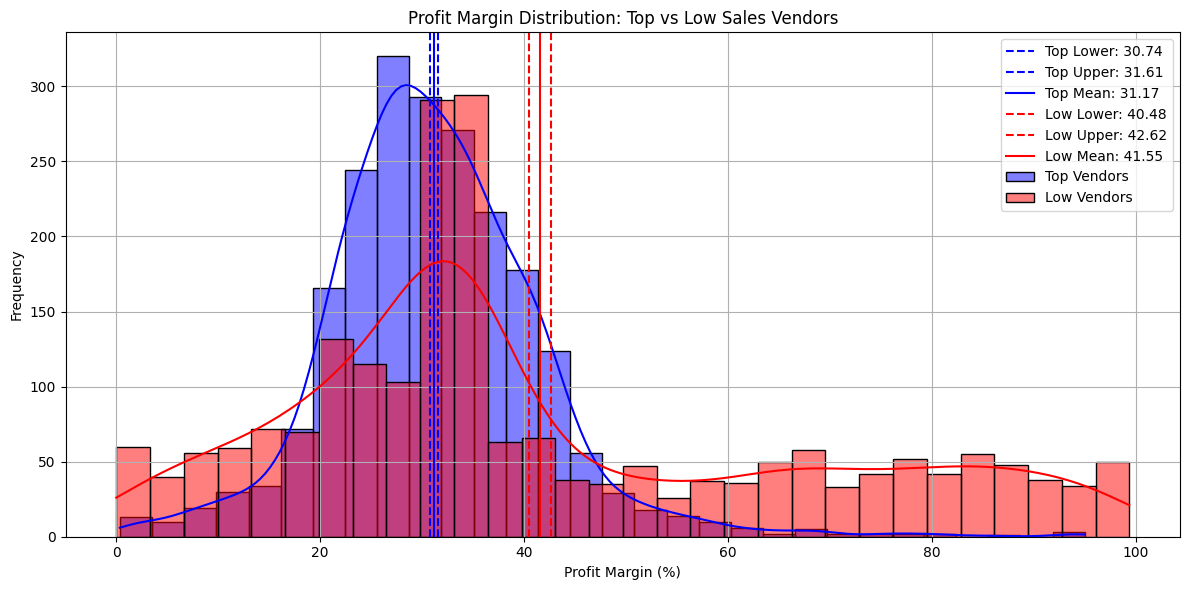

In [144]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), "f"Mean: {top_mean:.2f}")

print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), "f"Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot( top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors" )

plt.axvline( top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}" )
plt.axvline( top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}" )
plt.axvline( top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}" )

# Low Vendors Plot
sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label="Low Vendors")

plt.axvline(low_lower,color="red",linestyle="--",label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper,color="red",linestyle="--",label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,color="red",linestyle="-",label=f"Low Mean: {low_mean:.2f}")

plt.title("Profit Margin Distribution: Top vs Low Sales Vendors")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Confidence Interval Insights and Business Implications

- The confidence interval for **low-performing vendors** (**40.48% to 42.62%**) is significantly higher than that of **top-performing vendors** (**30.74% to 31.61%**).
- This indicates that vendors with lower sales volumes tend to maintain **higher profit margins**, potentially due to premium pricing strategies or lower operational costs.
- **For high-performing vendors**: To improve profitability, these vendors could consider selective price adjustments, cost optimization initiatives, or product bundling strategies.
- **For low-performing vendors**: Although margins are higher, the low sales volume suggests opportunities for enhanced marketing efforts, more competitive pricing, or improvements in distribution and market reach.


### Hypothesis Testing: Profit Margin Comparison

**Research Question:**  
Is there a significant difference in profit margins between top-performing and low-performing vendors?

**Hypotheses:**
- **H₀ (Null Hypothesis):** There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
- **H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are significantly different.


In [145]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test (Welch’s t-test)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top- and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6440, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top- and low-performing vendors.


In [149]:
ff = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
ff.to_csv("vendor_sales_summary.csv", index=False)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,AvgSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,35.916617,260999.20,68601.68,1290667.91,25.2976925149551,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,30.072784,294438.66,144929.24,1015032.27,21.0628095235867,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,24.249870,343854.07,123780.22,1119816.92,24.6757858308182,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,22.333857,368242.80,257032.07,1214774.94,27.1399084080312,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,31.089295,249587.83,257032.07,1199901.61,28.412764200414,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,1.595000e+01,3.190000,0.55,27100.41,13.31,83.448275862069,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,6.566000e+01,0.490000,7.04,50293.62,63.32,96.4361864148644,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.980000e+00,0.990000,0.10,14069.87,0.50,25.2525252525252,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,1.432800e+02,1.990000,15.12,257032.07,141.81,98.9740368509213,72.000000,97.469388
